In [1]:
import pandas as pd
import tqdm
from tqdm import tqdm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv('D:\\CAPSTONE\\gkg_masterV3_AutomobileV2.csv') # import the downloaded data 

In [4]:
df.shape

(208040, 11)

In [5]:
# Delimit sentiment values into respective columns 

# create new fields
Tone = [float(x.split(',')[0]) for x in df.V2Tone.tolist()]
Positive_Score = [float(x.split(',')[1]) for x in df.V2Tone.tolist()]
Negative_Score = [float(x.split(',')[2]) for x in df.V2Tone.tolist()]
Polarity = [float(x.split(',')[3]) for x in df.V2Tone.tolist()]
Active_Reference_Desnity = [float(x.split(',')[4]) for x in df.V2Tone.tolist()]
Self_OR_Group_Reference_Density = [float(x.split(',')[5]) for x in df.V2Tone.tolist()]
Word_Count = [int(x.split(',')[6]) for x in df.V2Tone.tolist()]

# add them to the master file 
ToneTable = pd.DataFrame(list(zip(Tone, Positive_Score, Negative_Score, Polarity, Active_Reference_Desnity, 
                      Self_OR_Group_Reference_Density, Self_OR_Group_Reference_Density, Word_Count)),
                         columns=['Tone', 'Positive_Score', 'Negative_Score', 'Polarity', 'Active_Reference_Desnity', 
                      'Self_OR_Group_Reference_Density', 'Self_OR_Group_Reference_Density', 'Word_Count'])

df = pd.concat([df,ToneTable], axis=1)

In [6]:
# change date format and create new month column
Date_N = pd.DataFrame([str(x)[0:8] for x in df.DATE.tolist()],columns=['Date_N'])
Month_Year = pd.DataFrame([str(x)[0:6] for x in df.DATE.tolist()],columns=['Month_Year'])
df=pd.concat([df, Date_N, Month_Year], axis = 1)

#drop some repeated columns
df = df.drop(['Unnamed: 0','DATE','V2Tone','Word_Count','V2Counts','V2Themes','V2Locations','V2Persons','Amounts','Active_Reference_Desnity','Self_OR_Group_Reference_Density','Self_OR_Group_Reference_Density'], axis = 1)

In [7]:
# tag company names 
companiesInQuestion = ['Volkswagen','Ford','Hertz','Tesla','Scania', 'Renault','Nissan','Toyota']
for company in tqdm(companiesInQuestion):
    ls = pd.DataFrame([1 if company in x else 0 for x in df.V2Organizations.tolist()],columns=[company+'_Tag'])
    df = pd.concat([df,ls], axis=1)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.73it/s]


In [8]:
df.V2Organizations

0         Napa County Sheriff Office,2967;Napa County Sh...
1                Nissan,346;Nissan,447;Standards Bureau,882
2         Federation Of German Consumer Organizations,31...
3         Napa County Sheriff Office,2967;Napa County Sh...
4                Nissan,346;Nissan,447;Standards Bureau,882
5         Federation Of German Consumer Organizations,31...
6            Youtube,468;Census Bureau,2299;Volkswagen,1937
7                                    Bmw,323;Volkswagen,305
8         Vw Group,69;Volkswagen,54;Volkswagen,1168;Volk...
9                       Toyota,1252;Toyota,1331;Toyota,1980
10        Nissan,37;Nissan,756;Nissan,772;Nissan,787;Nis...
11        Nissan,7;Nissan,226;Nissan,984;Nissan,1857;Nis...
12        New York Times,106;Great Alaska Adventure Lodg...
13        Nissan,370;Nissan,605;Nissan,2179;Maintenance ...
14        Volkswagen,246;Volkswagen,510;Volkswagen,633;V...
15        Nissan,583;Nissan,1865;Nissan,2180;Toyota,918;...
16              Volkswagen,2453;Pricewat

In [9]:
df.head(10)

,DocumentIdentifier,V2Organizations,Quotations,Tone,Positive_Score,Negative_Score,Polarity,Date_N,Month_Year,Volkswagen_Tag,Ford_Tag,Hertz_Tag,Tesla_Tag,Scania_Tag,Renault_Tag,Nissan_Tag,Toyota_Tag
0,https://www.sfgate.com/news/bayarea/article/Mo...,"Napa County Sheriff Office,2967;Napa County Sh...",NaN,-5.186591,1.581278,6.767868,8.349146,20191001,201910,1,0,0,0,0,0,0,0
1,https://toronto.citynews.ca/2019/09/30/off-dut...,"Nissan,346;Nissan,447;Standards Bureau,882",NaN,-10.407240,0.452489,10.859729,11.312217,20191001,201910,0,0,0,0,0,0,1,0
2,https://www.journalgazette.net/business/201909...,"Federation Of German Consumer Organizations,31...",NaN,-6.060606,0.303030,6.363636,6.666667,20191001,201910,1,0,0,0,0,0,0,0
3,https://www.sfgate.com/news/bayarea/article/Mo...,"Napa County Sheriff Office,2967;Napa County Sh...",NaN,-5.186591,1.581278,6.767868,8.349146,20191001,201910,1,0,0,0,0,0,0,0
4,https://toronto.citynews.ca/2019/09/30/off-dut...,"Nissan,346;Nissan,447;Standards Bureau,882",NaN,-10.407240,0.452489,10.859729,11.312217,20191001,201910,0,0,0,0,0,0,1,0
5,https://www.journalgazette.net/business/201909...,"Federation Of German Consumer Organizations,31...",NaN,-6.060606,0.303030,6.363636,6.666667,20191001,201910,1,0,0,0,0,0,0,0
6,https://www.foxnews.com/tech/apples-steve-jobs...,"Youtube,468;Census Bureau,2299;Volkswagen,1937","1404|205||There is a sense , though , that man...",0.411523,2.469136,2.057613,4.526749,20191001,201910,1,0,0,0,0,0,0,0
7,https://www.thestar.com.my/news/nation/2019/10...,"Bmw,323;Volkswagen,305",NaN,-4.152249,1.038062,5.190311,6.228374,20191001,201910,1,0,0,0,0,0,0,0
8,https://www.autoexpress.co.uk/volkswagen/calif...,"Vw Group,69;Volkswagen,54;Volkswagen,1168;Volk...",NaN,1.062323,2.974504,1.912181,4.886686,20191001,201910,1,0,0,0,0,0,0,0
9,https://www.nzherald.co.nz/fires/news/article....,"Toyota,1252;Toyota,1331;Toyota,1980",2696|25||It was lucky to save it .,0.000000,1.934524,1.934524,3.869048,20191001,201910,0,0,0,0,0,0,0,1


In [10]:
df.columns

Index(['DocumentIdentifier', 'V2Organizations', 'Quotations', 'Tone',
       'Positive_Score', 'Negative_Score', 'Polarity', 'Date_N', 'Month_Year',
       'Volkswagen_Tag', 'Ford_Tag', 'Hertz_Tag', 'Tesla_Tag', 'Scania_Tag',
       'Renault_Tag', 'Nissan_Tag', 'Toyota_Tag'],
      dtype='object')

In [11]:
#selecting the companmy in  question
df_A=df[df['Tesla_Tag'] == 1]

In [12]:
df_A.shape
df_A.head()

(2301, 17)

,DocumentIdentifier,V2Organizations,Quotations,Tone,Positive_Score,Negative_Score,Polarity,Date_N,Month_Year,Volkswagen_Tag,Ford_Tag,Hertz_Tag,Tesla_Tag,Scania_Tag,Renault_Tag,Nissan_Tag,Toyota_Tag
48,https://cleantechnica.com/2019/09/30/will-1-ro...,"Nissan,2658;Nissan,3391;Youtube,3532;Toyota,26...",992|210||Autonomous vehicles will transform pe...,2.421308,4.721550,2.300242,7.021792,20191001,201910,0,0,0,1,0,0,1,1
130,https://www.marketwatch.com/press-release/elec...,"Renault,2063;Renault,4441;Toyota,2087;Toyota,4...",NaN,0.728155,1.334951,0.606796,1.941748,20191001,201910,0,0,0,1,0,1,1,1
280,https://www.theguardian.pe.ca/business/reuters...,"Volkswagen,285;Tesla Inc,24",NaN,1.136364,2.272727,1.136364,3.409091,20191001,201910,1,0,0,1,0,0,0,0
295,http://newsviewsnreviews.com/2019/10/despite-d...,"Volkswagen,331;Tesla Inc,72",NaN,0.980392,2.941176,1.960784,4.901961,20191001,201910,1,0,0,1,0,0,0,0
297,http://newsviewsnreviews.com/2019/10/despite-d...,"Volkswagen,331;Tesla Inc,72",NaN,0.980392,2.941176,1.960784,4.901961,20191001,201910,1,0,0,1,0,0,0,0


In [13]:
df_WC= df_A.drop(['DocumentIdentifier', 'V2Organizations', 'Tone', 'Positive_Score',
       'Negative_Score', 'Polarity','Date_N', 'Month_Year','Volkswagen_Tag', 'Ford_Tag', 'Hertz_Tag', 'Tesla_Tag', 'Scania_Tag',
       'Renault_Tag', 'Nissan_Tag', 'Toyota_Tag'],axis=1)

In [14]:
df_WC.shape

(2301, 1)

In [15]:
type(df_WC)

pandas.core.frame.DataFrame

In [16]:
df_WC=df_WC[df_WC.Quotations.notna()]

In [17]:
#df_WC=df_WC.reset_index()

In [18]:
pd.options.display.max_colwidth = 200
df_WC.shape
df_WC.head(10)

(490, 1)

,Quotations
48,992|210||Autonomous vehicles will transform personal mobility x2026 ; xA0 ; reap the benefits of a new market which promises to ramp from essentially $0 now to $10 trillion in global gross annual ...
659,"969|189||All Tesla Model 3 Standard Range will not accept order after Oct 13th , this will be the last shipment of the Made in US Model 3 , plz have ur test drive be4 Oct 7th and lock-in ur orders"
919,5870|27||green industrial revolution
1642,3119|75||Is NHTSA going to successfully get Tesla to send out a new software update?
2374,"11730|134||We have a shot at achieving our first 100 , 000 vehicle delivery quarter , which is an incredibly exciting milestone for our company!"
2625,5544|123||Subaru quandary is one of many reasons why California shouldn't be allowed to set de facto emission standards for the U S.
2783,5756|123||Subaru quandary is one of many reasons why California shouldn't be allowed to set de facto emission standards for the U S.
3184,415|52||One of the World 50 Best Business School Professors
6278,6832|55||We could convert what we're overproducing into hydrogen
13509,3354|70||actually more restrictive on CO2 emissions than the Obama proposal was#4856|32||boost profits by getting smaller#5201|25||performance recovery plan#5368|28||practically giving away cars#9...


In [19]:
# library to clean data 
import re  
  
# Natural Language Tool Kit 
import nltk  
  
nltk.download('stopwords') 
  
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
corpus = []  

In [21]:
# 1424 (reviews) rows to clean 
for i in df_WC['Quotations']:  
      
    # column : "Review", row ith 
    Quotations = re.sub('[^a-zA-Z]', ' ', str(i) ) 
    
      
    # convert all cases to lower cases 
    Quotations = Quotations.lower()  
      
    # split to array(default delimiter is " ") 
    Quotations = Quotations.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
    # loop for stemming each word 
    # in string array at ith row     
    Quotations = [ps.stem(word) for word in Quotations 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    Quotations = ' '.join(Quotations)   
      
    # append each string to create 
    # array of clean text  
    corpus.append(Quotations)

In [22]:
corpus

['autonom vehicl transform person mobil x xa reap benefit new market promis ramp essenti trillion global gross annual revenu',
 'tesla model standard rang accept order oct th last shipment made us model plz ur test drive oct th lock ur order',
 'green industri revolut',
 'nhtsa go success get tesla send new softwar updat',
 'shot achiev first vehicl deliveri quarter incred excit mileston compani',
 'subaru quandari one mani reason california allow set de facto emiss standard u',
 'subaru quandari one mani reason california allow set de facto emiss standard u',
 'one world best busi school professor',
 'could convert overproduc hydrogen',
 'actual restrict co emiss obama propos boost profit get smaller perform recoveri plan practic give away car cannot far futur',
 'giant distribut global util',
 'fulli function full self drive reliabl enough need pay attent',
 'fulli function full self drive reliabl enough need pay attent',
 'fulli function full self drive reliabl enough need pay atten

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [24]:
#Creating the string text file for visualizing in word cloud
def comment(token):
    comment_words = ' '
    for word in token:
        comment_words = comment_words + word + ' '
    return comment_words

In [25]:
cleaned_text = comment(corpus)

In [26]:
cleaned_text

' autonom vehicl transform person mobil x xa reap benefit new market promis ramp essenti trillion global gross annual revenu tesla model standard rang accept order oct th last shipment made us model plz ur test drive oct th lock ur order green industri revolut nhtsa go success get tesla send new softwar updat shot achiev first vehicl deliveri quarter incred excit mileston compani subaru quandari one mani reason california allow set de facto emiss standard u subaru quandari one mani reason california allow set de facto emiss standard u one world best busi school professor could convert overproduc hydrogen actual restrict co emiss obama propos boost profit get smaller perform recoveri plan practic give away car cannot far futur giant distribut global util fulli function full self drive reliabl enough need pay attent fulli function full self drive reliabl enough need pay attent fulli function full self drive reliabl enough need pay attent fulli function full self drive reliabl enough need

In [27]:
type(cleaned_text)

str

In [28]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(cleaned_text)

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

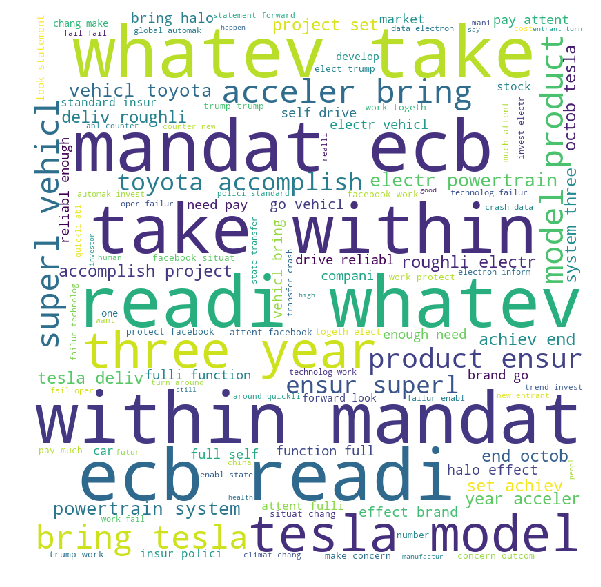

In [29]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [30]:
df_R=df_A.sort_values(by='Date_N', ascending=False)

In [31]:
df_R.head(5)

,DocumentIdentifier,V2Organizations,Quotations,Tone,Positive_Score,Negative_Score,Polarity,Date_N,Month_Year,Volkswagen_Tag,Ford_Tag,Hertz_Tag,Tesla_Tag,Scania_Tag,Renault_Tag,Nissan_Tag,Toyota_Tag
208034,https://www.theglobeandmail.com/investing/markets/inside-the-market/article-contra-guys-tesla-is-soaring-but-how-long-will-it-last/,"Twitter,3250;Rivian Automotive,1978;Honda,734;Yahoo Inc,818;Tesla Inc,108;Bmw,676;Volkswagen,747;Volkswagen,1920;Ferrari,686",NaN,-1.662050,2.216066,3.878116,6.094183,20200831,202008,1,0,0,1,0,0,0,0
207898,https://www.torquenews.com/1083/toyota-s-rav4-prime-phev-rivals-battery-electric-vehicles-tesla-model-y-reduced-repair-and-maintenance-needs,"Linkedin,6110;Toyota,245;Toyota,429;Toyota,516;Toyota,842;Toyota,897;Toyota,1149;Toyota,1333;Toyota,1470;Toyota,1696;Toyota,1802;Toyota,1844;Toyota,2125;Toyota,2148;Toyota,2190;Toyota,2325;Toyota,...",NaN,1.220657,2.347418,1.126761,3.474178,20200831,202008,0,0,0,1,0,0,0,1
207896,https://www.torquenews.com/comment/reply/38669,"Linkedin,6109;Toyota,244;Toyota,428;Toyota,515;Toyota,841;Toyota,896;Toyota,1148;Toyota,1332;Toyota,1469;Toyota,1695;Toyota,1801;Toyota,1843;Toyota,2124;Toyota,2147;Toyota,2189;Toyota,2324;Toyota,...",NaN,1.221805,2.349624,1.127820,3.477444,20200831,202008,0,0,0,1,0,0,0,1
207052,https://www.wealthdaily.com/articles/battery-day-a-make-or-break-moment-for-tesla/97017,"Honda Motor Co,232;Ford Motor Company,272;Toyota,215;Nasdaq,51;Tesla Inc,43",NaN,-0.502008,2.510040,3.012048,5.522088,20200829,202008,0,1,0,1,0,0,0,1
206518,https://www.thesundaily.my/world/reuters/reuters-news-schedule-at-6-a-m-gmt-2-p-m-sgt-LY3717049,"Nissan,12067;Nissan,12112;Nissan,12217;Republican National Convention,4265;Nissan Motor Co,12226;Cajun Navy,12859;Cajun Navy,13278;National Basketball Association,3022;Tesla Inc,2079;Reuters,62;Re...",NaN,-3.789568,2.496656,6.286224,8.782880,20200828,202008,0,0,0,1,0,0,1,0


In [32]:
df_R = df_R[['Date_N','DocumentIdentifier','Positive_Score','Negative_Score','Polarity']]

In [33]:
pd.options.display.max_colwidth = 200
df_R.head(10)

,Date_N,DocumentIdentifier,Positive_Score,Negative_Score,Polarity
208034,20200831,https://www.theglobeandmail.com/investing/markets/inside-the-market/article-contra-guys-tesla-is-soaring-but-how-long-will-it-last/,2.216066,3.878116,6.094183
207898,20200831,https://www.torquenews.com/1083/toyota-s-rav4-prime-phev-rivals-battery-electric-vehicles-tesla-model-y-reduced-repair-and-maintenance-needs,2.347418,1.126761,3.474178
207896,20200831,https://www.torquenews.com/comment/reply/38669,2.349624,1.127820,3.477444
207052,20200829,https://www.wealthdaily.com/articles/battery-day-a-make-or-break-moment-for-tesla/97017,2.510040,3.012048,5.522088
206518,20200828,https://www.thesundaily.my/world/reuters/reuters-news-schedule-at-6-a-m-gmt-2-p-m-sgt-LY3717049,2.496656,6.286224,8.782880
206468,20200828,https://www.moneycontrol.com/news/world/tesla-shares-surge-to-record-high-leaving-rivals-behind-5765451.html,1.388889,2.430556,3.819444
206494,20200828,https://www.torquenews.com/11681/breaking-news-vw-apparently-using-tesla-powerpack-batteries-electrify-america,1.987578,2.732919,4.720497
206511,20200828,https://en.tempo.co/read/1380284/tesla-shares-surge-to-record-high-leaving-rivals-behind,1.351351,2.364865,3.716216
206541,20200828,https://www.carandbike.com/news/tesla-shares-surge-to-record-high-leaving-rivals-behind-2286636,1.557632,2.492212,4.049844
206686,20200828,https://www.torquenews.com/comment/reply/38633,1.990050,2.736318,4.726368


In [34]:
list(df_A.columns) 

['DocumentIdentifier',
 'V2Organizations',
 'Quotations',
 'Tone',
 'Positive_Score',
 'Negative_Score',
 'Polarity',
 'Date_N',
 'Month_Year',
 'Volkswagen_Tag',
 'Ford_Tag',
 'Hertz_Tag',
 'Tesla_Tag',
 'Scania_Tag',
 'Renault_Tag',
 'Nissan_Tag',
 'Toyota_Tag']

In [35]:
df_F= df_A.drop(['DocumentIdentifier',
 'V2Organizations',
 'Quotations',
 'Tone',
 'Positive_Score',
 'Negative_Score',
 'Polarity',
 'Month_Year',
 'Volkswagen_Tag',
 'Ford_Tag',
 'Hertz_Tag',
 'Tesla_Tag',
 'Scania_Tag',
 'Renault_Tag',
 'Nissan_Tag',
 'Toyota_Tag'],axis=1)

In [36]:
df_F.head()

,Date_N
48,20191001
130,20191001
280,20191001
295,20191001
297,20191001


In [37]:
df_F= df_F['Date_N'].value_counts()

In [38]:
type(df_F)

pandas.core.series.Series

In [39]:
df_F.head()

20200319    158
20200722    107
20200130     84
20200723     81
20200320     73
Name: Date_N, dtype: int64

In [40]:
df_F = pd.DataFrame({'Date':df_F.index, 'count':df_F.values})

In [41]:
df_F = df_F.sort_values(by='Date', ascending=True)

In [42]:
df_F.head()

,Date,count
47,20191001,11
109,20191002,5
132,20191003,3
216,20191004,2
138,20191005,3


In [43]:
df_F.shape

(279, 2)

In [44]:
df_F.values

array([['20191001', 11],
       ['20191002', 5],
       ['20191003', 3],
       ['20191004', 2],
       ['20191005', 3],
       ['20191007', 2],
       ['20191009', 3],
       ['20191010', 17],
       ['20191011', 26],
       ['20191012', 4],
       ['20191013', 2],
       ['20191014', 5],
       ['20191015', 1],
       ['20191017', 2],
       ['20191018', 1],
       ['20191021', 4],
       ['20191022', 3],
       ['20191023', 16],
       ['20191024', 8],
       ['20191025', 13],
       ['20191026', 2],
       ['20191027', 2],
       ['20191028', 25],
       ['20191029', 24],
       ['20191030', 30],
       ['20191031', 2],
       ['20191101', 3],
       ['20191102', 5],
       ['20191103', 2],
       ['20191104', 5],
       ['20191105', 2],
       ['20191106', 2],
       ['20191107', 1],
       ['20191108', 10],
       ['20191110', 1],
       ['20191111', 2],
       ['20191112', 3],
       ['20191113', 15],
       ['20191114', 35],
       ['20191115', 6],
       ['20191117', 3],
     

In [45]:
import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
# Importing NumPy library
import numpy as np

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Frequency')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

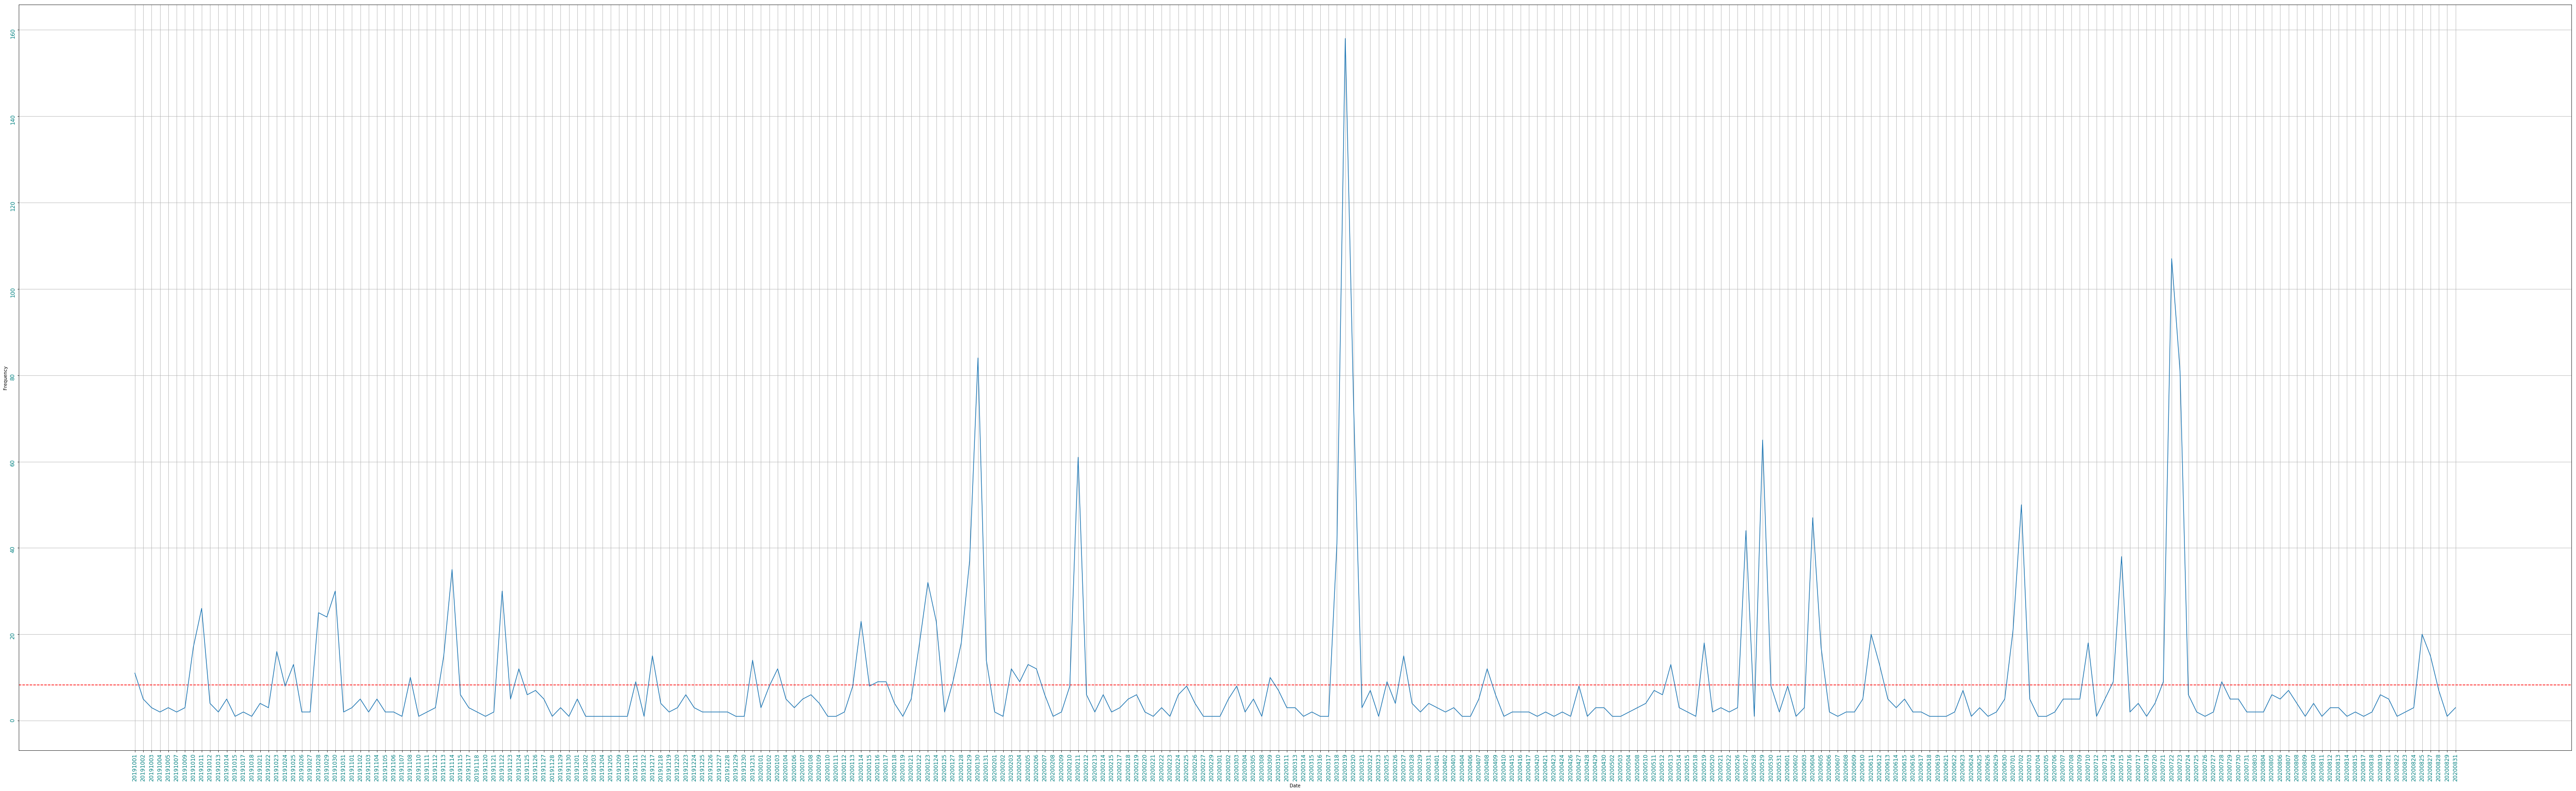

In [70]:
fig = plt.figure(figsize=(100,30))

plt.xlabel('Date')
plt.ylabel('Frequency')

x = df_F['Date']
y = df_F['count']

# Customizing the axes
plt.xticks(rotation=90, color='teal', size=12)
plt.yticks(rotation=90, color='teal', size=12)

# Adding the grid to the plot
plt.grid(True)

# Calculating the mean value of close prices
mean_count = np.mean(df_F['count'])

# Plotting the horizontal line along with the close prices
plt.axhline(mean_count, color='r', linestyle='dashed')

# Plot lists 'x' and 'y'
plt.plot(x, y)
plt.show()

In [47]:
df_T=df_A.drop(['DocumentIdentifier',
 'V2Organizations',
 'Quotations',
 'Month_Year',
 'Volkswagen_Tag',
 'Ford_Tag',
 'Hertz_Tag',
 'Tesla_Tag',
 'Scania_Tag',
 'Renault_Tag',
 'Nissan_Tag',
 'Toyota_Tag'],axis=1)

In [48]:
df_T.head()

,Tone,Positive_Score,Negative_Score,Polarity,Date_N
48,2.421308,4.721550,2.300242,7.021792,20191001
130,0.728155,1.334951,0.606796,1.941748,20191001
280,1.136364,2.272727,1.136364,3.409091,20191001
295,0.980392,2.941176,1.960784,4.901961,20191001
297,0.980392,2.941176,1.960784,4.901961,20191001


Text(0.5, 0, 'Date')

Text(0, 0.5, 'Tone')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

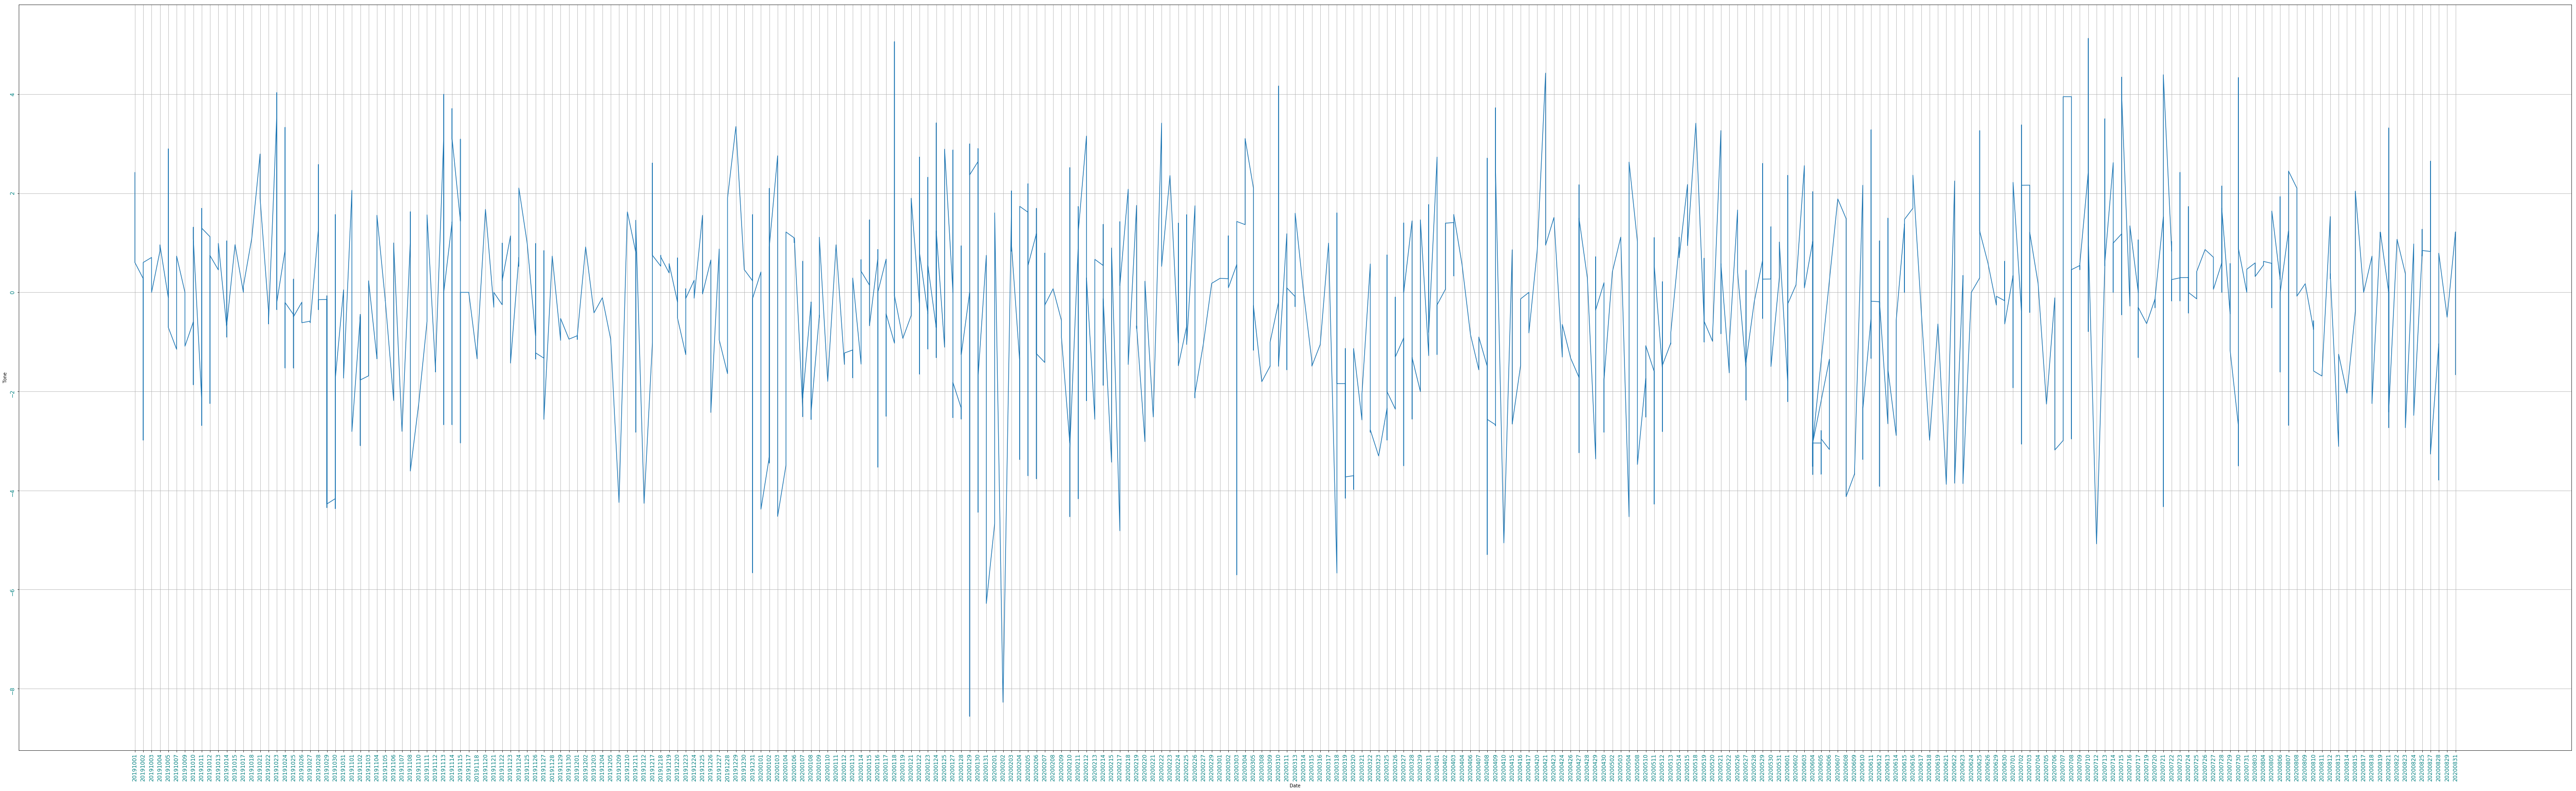

In [49]:
fig = plt.figure(figsize=(100,30))

plt.xlabel('Date')
plt.ylabel('Tone')

x = df_T['Date_N']
y = df_T['Tone']

# Customizing the axes
plt.xticks(rotation=90, color='teal', size=12)
plt.yticks(rotation=90, color='teal', size=12)

# Adding the grid to the plot
plt.grid(True)

# Plot lists 'x' and 'y'
plt.plot(x, y)
plt.show()

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Polarity')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

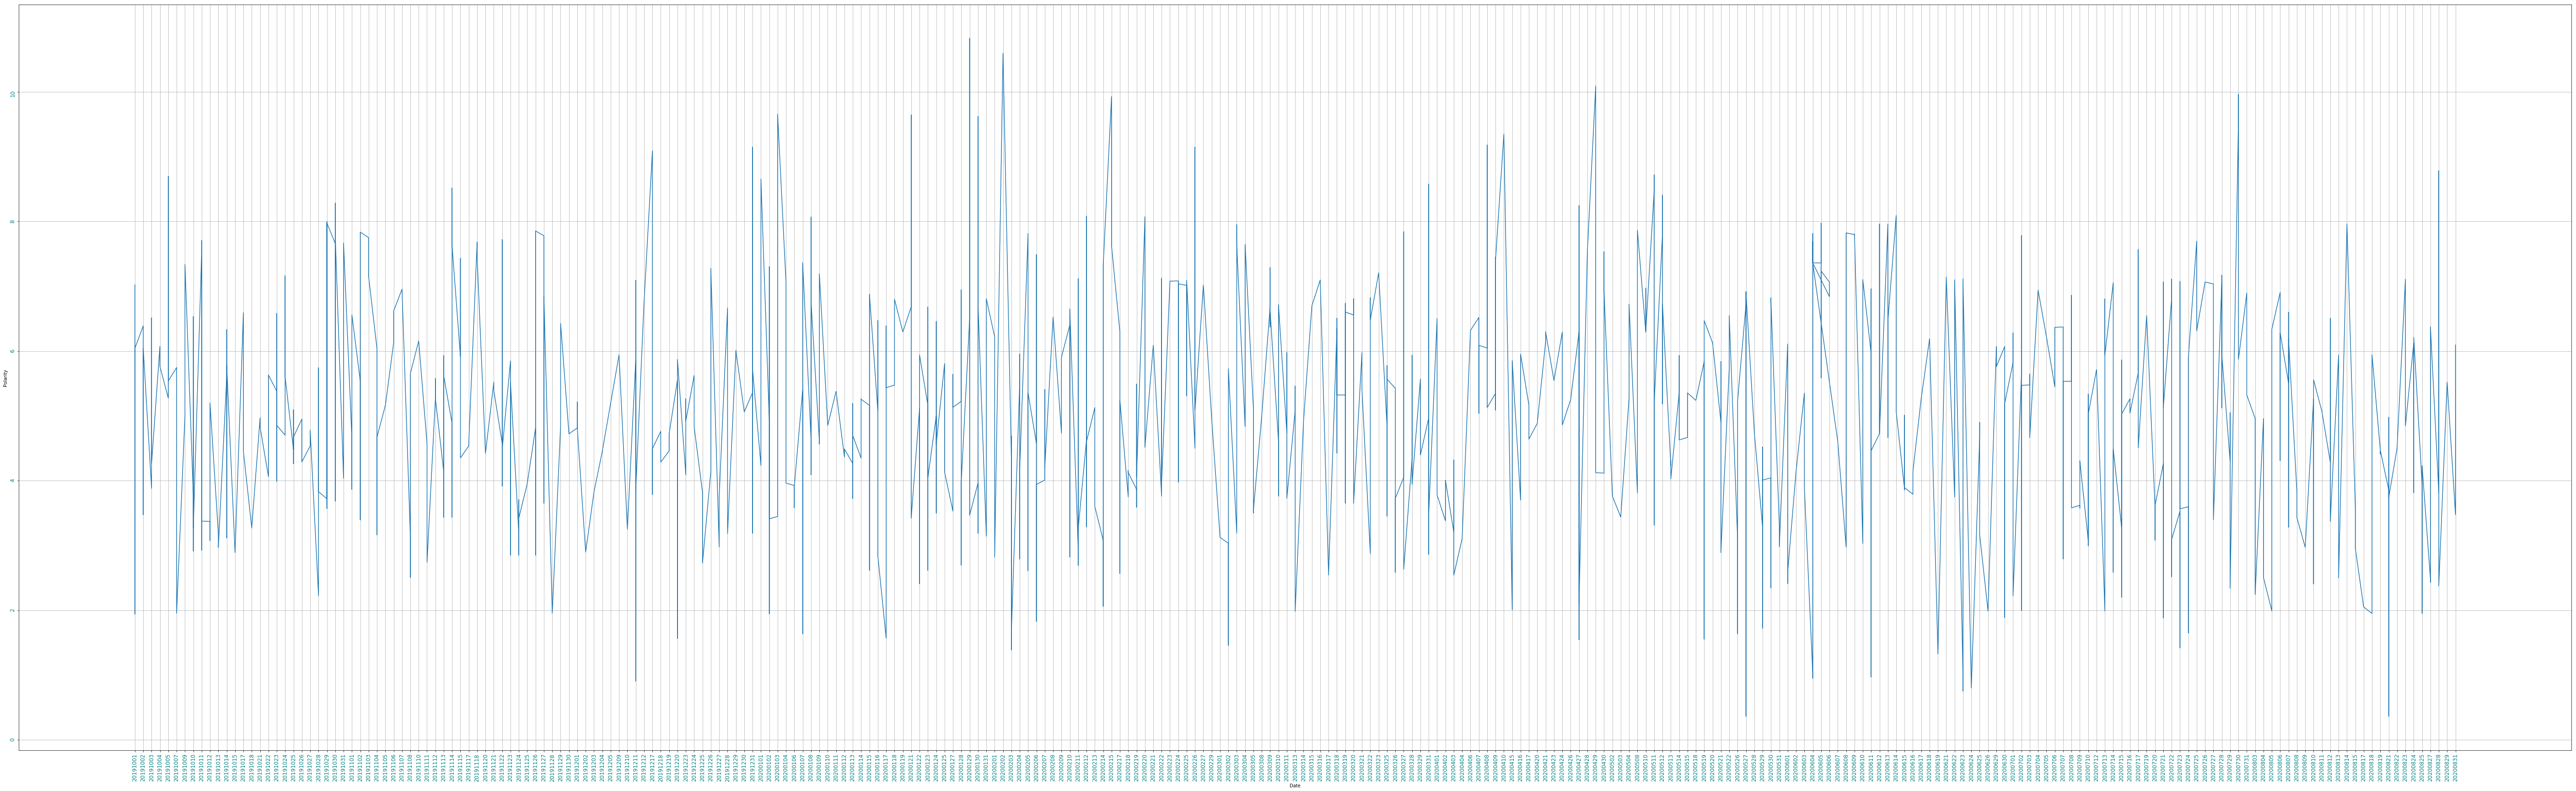

In [50]:
fig = plt.figure(figsize=(100,30))

plt.xlabel('Date')
plt.ylabel('Polarity')

x = df_T['Date_N']
y = df_T['Polarity']

# Customizing the axes
plt.xticks(rotation=90, color='teal', size=12)
plt.yticks(rotation=90, color='teal', size=12)

# Adding the grid to the plot
plt.grid(True)

# Plot lists 'x' and 'y'
plt.plot(x, y)
plt.show()

(array([ 17., 122., 688., 702., 441., 163.,  97.,  26.,  32.,  13.]),
 array([0.        , 0.6292517 , 1.2585034 , 1.8877551 , 2.5170068 ,
        3.1462585 , 3.7755102 , 4.4047619 , 5.03401361, 5.66326531,
        6.29251701]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Positive scores')

(array([242., 683., 492., 332., 331., 168.,  27.,  13.,   0.,  13.]),
 array([0.        , 0.96930533, 1.93861066, 2.90791599, 3.87722132,
        4.84652666, 5.81583199, 6.78513732, 7.75444265, 8.72374798,
        9.69305331]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Negative scores')

(array([ 13.,   1.,  19., 165., 383., 380., 872., 333., 121.,  14.]),
 array([-8.56219709, -7.19315687, -5.82411665, -4.45507643, -3.0860362 ,
        -1.71699598, -0.34795576,  1.02108446,  2.39012468,  3.75916491,
         5.12820513]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Overall Tone')

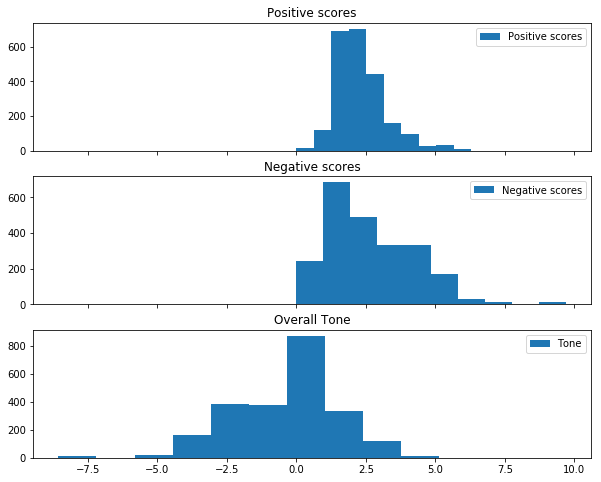

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))

ax1.hist(df_T['Positive_Score'],label='Positive scores')
ax1.set_title('Positive scores')
ax1.legend()
ax2.hist(df_T['Negative_Score'],label='Negative scores')
ax2.set_title('Negative scores')
ax2.legend()
ax3.hist(df_T['Tone'],label='Tone')
ax3.set_title('Overall Tone')
ax3.legend()

In [52]:
#Rule based automate generation of warning emails
import statistics 
import smtplib
import smtplib
import time
import datetime
from datetime import date
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders


In [53]:
def sendmail(x,y,z):

    fromaddr = "testfrom73@gmail.com"
    toaddr = "toaddrtest@gmail.com"

    #   Date
    today = datetime.datetime.today ()
    tday = today.strftime ("%m-%d-%Y")

    msg = MIMEMultipart()

    msg['From'] = fromaddr
    msg['To'] = ", ".join(toaddr)
    msg['Subject'] = "EWS_CRM_NOTIFICATION_" +  tday

    body = """\
    <html>
      <head></head>
      <body>
    <p>Hi Team,<br>
    <br>
    Notification as of """ + tday + """.<br>
    <br>
    This is to notify the company under threat is """ + str(x) + """ !!!<br>
    <br>
    Average Count of News Published yesterday is """ + str(y) + """.<br>
    <br>
    Overall Tone of all News Published yestrday is """ + str(z) + """.<br>
    <br>
    Do check the DASHBOARD for more details.<br>
    <br>
    Regards,
    <br>
    EWS_CRM<br>
    <br>
        </p>
      </body>
    </html>
    """

    msg.attach(MIMEText(body, 'html'))

    conn = smtplib.SMTP('smtp.gmail.com',587)
    conn.ehlo()
    conn.starttls()
    conn.login('testfrom73@gmail.com','Admin0406')
    text = msg.as_string()
    conn.sendmail(fromaddr, toaddr, text)
    conn.quit()

In [54]:
#importing the file with required quantifiers on latest news published.
dfM  = pd.read_csv('D:\\CAPSTONE\\Book1.csv') 
dfM

,Company,AOI,TOI,AVG
0,Volkswagen,67,-0.458670,181
1,Ford,5,0.624430,14
2,Hertz,3,-1.392094,3
3,Tesla,3,0.260137,8
4,Scania,2,-0.713810,1
5,Renault,138,-0.701107,113
6,Nissan,136,-1.093770,201
7,Toyota,265,0.192362,260


In [55]:
for i in range(1,8):
        if ((dfM.AOI[i] > dfM.AVG[i]) and (dfM.TOI[i] < 0)):
            sendmail(dfM.Company[i],dfM.AOI[i],dfM.TOI[i])
        else:
             print(" Have a look at Dashboard to know about " + dfM.Company[i])

 Have a look at Dashboard to know about Ford
 Have a look at Dashboard to know about Hertz
 Have a look at Dashboard to know about Tesla
 Have a look at Dashboard to know about Nissan
 Have a look at Dashboard to know about Toyota
